# Mental Health Data Report


This data set is taken from [Kaggle.com](https://www.kaggle.com/osmi/mental-health-in-tech-survey). 
This is a dataset from a 2014 survey (over 1200 responses recieved) that measures attitudes towards mental health and frequency of mental health disorders in workplaces. 
<B>Goal</B><br>
Our goal is to find out the key factors to mental health problems in the workplace. We are going to perform some descriptive analysis on the survey data and predict treatment based on predictors. This will help in finding out methods to improve worker's experience in a tech workplace.

### Describing the Data:
There are altogether 1200 rows i.e. observations and 27 Columns which are given below : 
 
**1. Timestamp**<br>
**2. Age**<br>
**3. Gender**<br>
**4. Country**<br>
**5. state**: If you live in the United States, which state or territory do you live in?<br>
**6. self_employed**: Are you self-employed?<br>
**7. family_history**: Do you have a family history of mental illness?<br>
**8. treatment**: Have you sought treatment for a mental health condition?<br>
**9. work_interfere**: If you have a mental health condition, do you feel that it interferes with
your work?<br>
**10. no_employees**: How many employees does your company or organization have?<br>
**11. remote_work**: Do you work remotely (outside of an office) at least 50% of the time?<br>
**12. tech_company**: Is your employer primarily a tech company/organization?<br>
**13. benefits**: Does your employer provide mental health benefits?<br>
**14. care_options**: Do you know the options for mental health care your employer provides?<br>
**15. wellness_program**: Has your employer ever discussed mental health as part of an
employee wellness program?<br>
**16. seek_help**: Does your employer provide resources to learn more about mental health
issues and how to seek help?<br>
**17. anonymity**: Is your anonymity protected if you choose to take advantage of mental
health or substance abuse treatment resources?<br>
**18. leave**: How easy is it for you to take medical leave for a mental health condition?<br>
**19. mental_health_consequence**: Do you think that discussing a mental health issue with
your employer would have negative consequences?<br>
**20. phys_health_consequence**: Do you think that discussing a physical health issue with
your employer would have negative consequences?<br>
**21. coworkers**: Would you be willing to discuss a mental health issue with your coworkers?<br>
**22. supervisor**: Would you be willing to discuss a mental health issue with your direct
supervisor(s)?<br>
**23. mental_health_interview**: Would you bring up a mental health issue with a potential
employer in an interview?<br>
**24. phys_health_interview**: Would you bring up a physical health issue with a potential
employer in an interview?<br>
**25. mental_vs_physical**: Do you feel that your employer takes mental health as seriously as
physical health?<br>
**26. obs consequence**: Have you heard of or observed negative consequences for coworkers
with mental health conditions in your workplace?<br>



## 1. Importing Data

In [1]:
#Importing initial libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
#Import Data
df_survey_data = pd.read_csv('Data/survey.csv', na_filter=False)
df_survey_data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NA,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NA
1,2014-08-27 11:29:37,44,M,United States,IN,NA,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NA
2,2014-08-27 11:29:44,32,Male,Canada,NA,NA,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NA
3,2014-08-27 11:29:46,31,Male,United Kingdom,NA,NA,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NA
4,2014-08-27 11:30:22,31,Male,United States,TX,NA,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NA


In [4]:
#Checking data row count
print(df_survey_data.shape)

(1259, 27)


In [5]:
#Checking distribution of the data
print(df_survey_data.describe())

                Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11


In [6]:
#Looking at column datatypes
print(df_survey_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
Timestamp                    1259 non-null object
Age                          1259 non-null int64
Gender                       1259 non-null object
Country                      1259 non-null object
state                        1259 non-null object
self_employed                1259 non-null object
family_history               1259 non-null object
treatment                    1259 non-null object
work_interfere               1259 non-null object
no_employees                 1259 non-null object
remote_work                  1259 non-null object
tech_company                 1259 non-null object
benefits                     1259 non-null object
care_options                 1259 non-null object
wellness_program             1259 non-null object
seek_help                    1259 non-null object
anonymity                    1259 non-null object
leave                        1259 non-null o

## Data Wrangling

The dataset must be cleaned to remove the junk data before getting insights from data and build a predictive model.<Br>
Below are some of the techniques used to deal with abnormalities in data:<br>
1. Dropping Unnecessary columns
2. Removing outliers 
3. Renaming Categorical values

In [7]:
#Drop unnecessary columns
df_survey_data.drop(['Timestamp','comments','state'], axis=1, inplace=True)

In [152]:
df_survey_data.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NA,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NA,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NA,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NA,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NA,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [153]:
#check for null values
df_survey_data.isnull().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

#### Age Column

Checking Age column to see if there is anything to clean

In [8]:
#Check minimum and maximum values of age column
print(df_survey_data['Age'].min())
print(df_survey_data['Age'].max())

-1726
99999999999


In [9]:
#Looking for outliers in Age column. Age of employees are generally between 18 and 75.
df_survey_data[(df_survey_data['Age'] < 18) | (df_survey_data['Age'] > 75)]

#So, let's just pick all the records between 18 and 75
#df_survey_data = df_survey_data[(df_survey_data['Age'] >= 18) | (df_survey_data['Age'] <= 75)]
df_survey_data.drop(df_survey_data[(df_survey_data['Age'] < 18) | (df_survey_data['Age'] > 75)].index, inplace=True)

# Gender Column

In [10]:
#Clean Gender Column
df_survey_data['Gender'].str.lower().unique()

array(['female', 'm', 'male', 'male-ish', 'maile', 'trans-female',
       'cis female', 'f', 'something kinda male?', 'cis male', 'woman',
       'mal', 'male (cis)', 'queer/she/they', 'non-binary', 'femake',
       'make', 'nah', 'enby', 'fluid', 'genderqueer', 'female ',
       'androgyne', 'agender', 'cis-female/femme', 'guy (-ish) ^_^',
       'male leaning androgynous', 'male ', 'man', 'trans woman', 'msle',
       'neuter', 'female (trans)', 'queer', 'female (cis)', 'mail',
       'malr', 'femail', 'cis man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [11]:
#Creating gender groups - This logic idea taken from:https://www.kaggle.com/kairosart/machine-learning-for-mental-health

gender_male = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr",
            "cis man", "Cis Male", "cis male"]

gender_female = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

gender_trans = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid",
             "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman",
             "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]

for (row, col) in df_survey_data.iterrows():

    if str.lower(col.Gender) in gender_male:
        df_survey_data['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in gender_female:
        df_survey_data['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in gender_trans:
        df_survey_data['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

#Get rid of unknown values
df_survey_data = df_survey_data[~df_survey_data['Gender'].isin(['A little about you', 'p'])]

print(df_survey_data['Gender'].unique())

['female' 'male' 'trans']


# Self_employed Column

No     1091
Yes     142
NA       18
Name: self_employed, dtype: int64

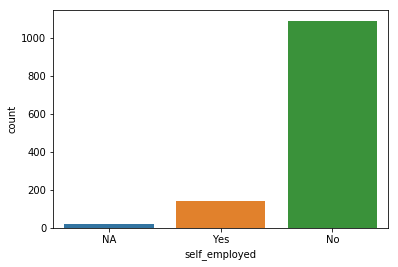

In [12]:
# Cleaning self_employed column
sns.countplot(df_survey_data['self_employed'])
df_survey_data['self_employed'].value_counts()

No     1109
Yes     142
Name: self_employed, dtype: int64

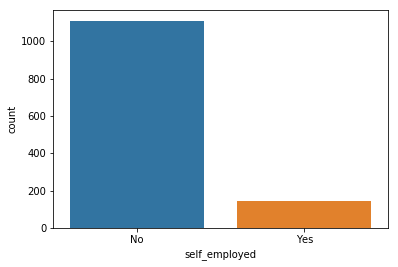

In [14]:
# Treating the 18 'NA' values for self_employed as Not Self employed i.e. 'No'
sns.countplot(df_survey_data['self_employed'])
df_survey_data['self_employed'] = df_survey_data['self_employed'].replace('NA', 'No')
df_survey_data['self_employed'].value_counts()

# Work_interfere Column

Sometimes    464
NA           262
Never        212
Rarely       173
Often        140
Name: work_interfere, dtype: int64

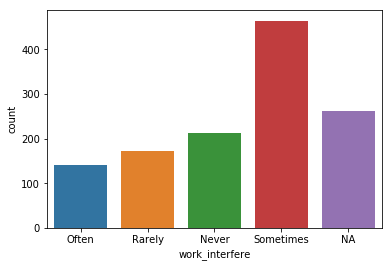

In [15]:
# Looking at work_interfere column
sns.countplot(df_survey_data['work_interfere'])
df_survey_data['work_interfere'].value_counts()

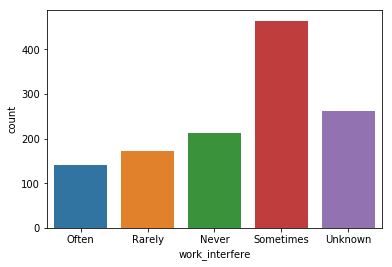

In [17]:
# Cleaning work_interfere column - replacing NAs with Unknown
df_survey_data['work_interfere'] = df_survey_data['work_interfere'].replace('NA', 'Unknown' )
df_survey_data['work_interfere'].value_counts()
sns.countplot(df_survey_data['work_interfere'])

# Creating Feature column as ranges of Age

In [18]:

df_survey_data['age_bins'] = pd.cut(df_survey_data['Age'], [0,20,40,60,80], 
                                    labels=["0-20", "21-40", "41-60","61-75"], include_lowest=True)

21-40    1081
41-60     144
0-20       22
61-75       4
Name: age_bins, dtype: int64

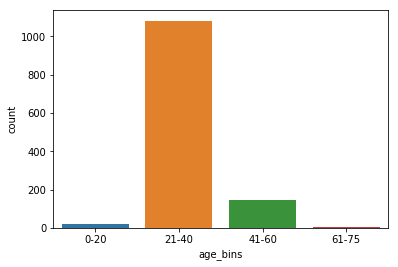

In [19]:
#looking at age bins
sns.countplot(df_survey_data['age_bins'])
df_survey_data['age_bins'].value_counts()

##### •	Most of the people working in tech industry who have responded to the survey fall between 21-40 years of age.

# Data Visualization



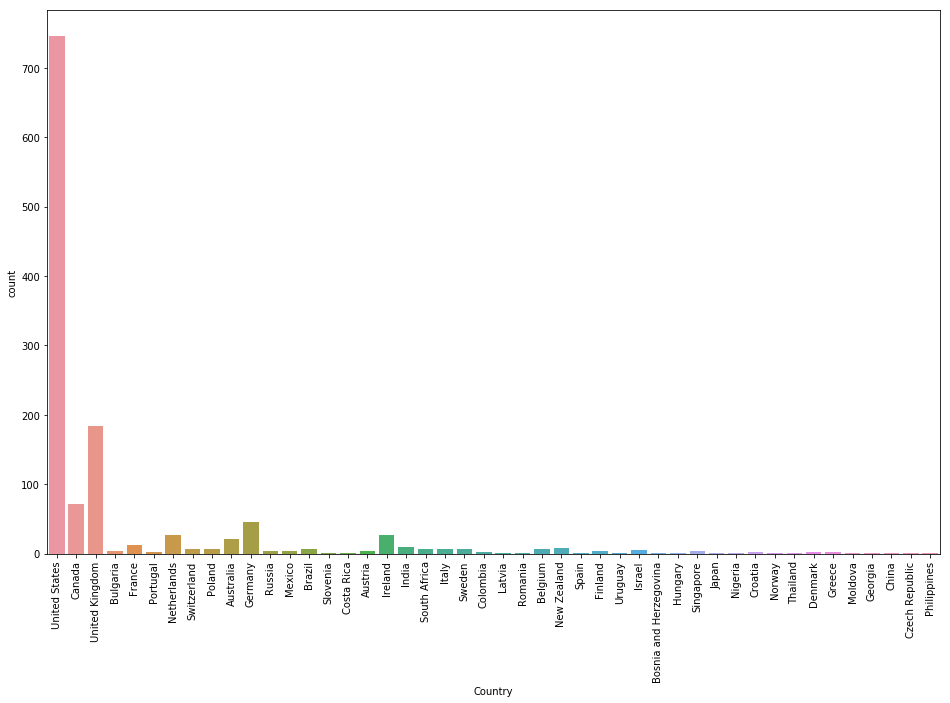

In [20]:
# Number of respondents w.r.t. country
plt.figure(figsize=(16,10))
plt.xticks(rotation=90)
sns.countplot(df_survey_data['Country'])

##### Insight: A high percentage of the surveyors are from USA.

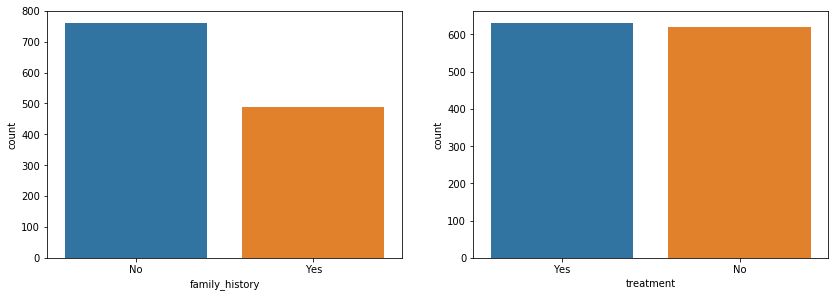

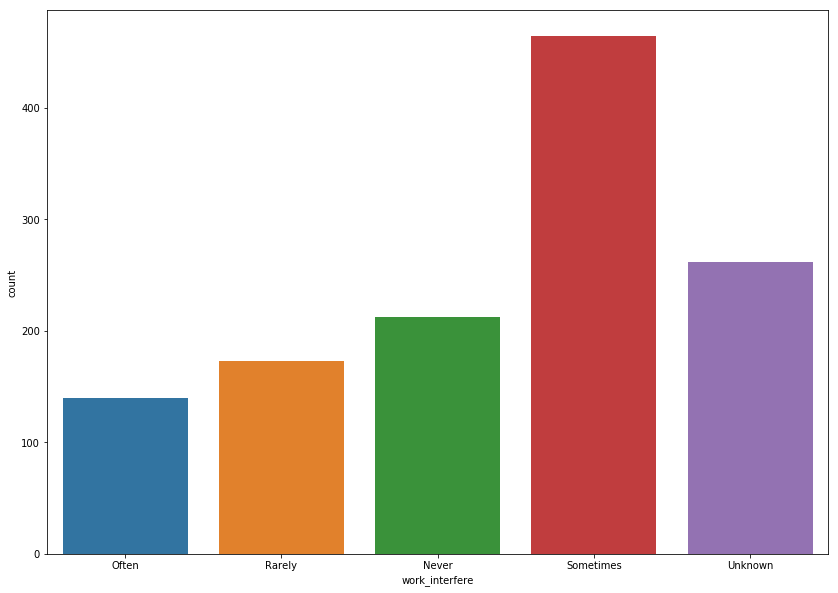

In [21]:
# Do you have a family history?
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.countplot(df_survey_data['family_history'])
# Have you sought treatment for a mental health condition?
plt.subplot(2,2,2)
sns.countplot(df_survey_data['treatment'])
plt.show()
plt.figure(figsize=(14,10))
sns.countplot(df_survey_data['work_interfere'])

#####  Insights:
**Most of the people in the tech industry do not have a family history of mental illness.<br>
More than 50% of the people surveyed are experiencing mental health issues, indicated by treatment.**

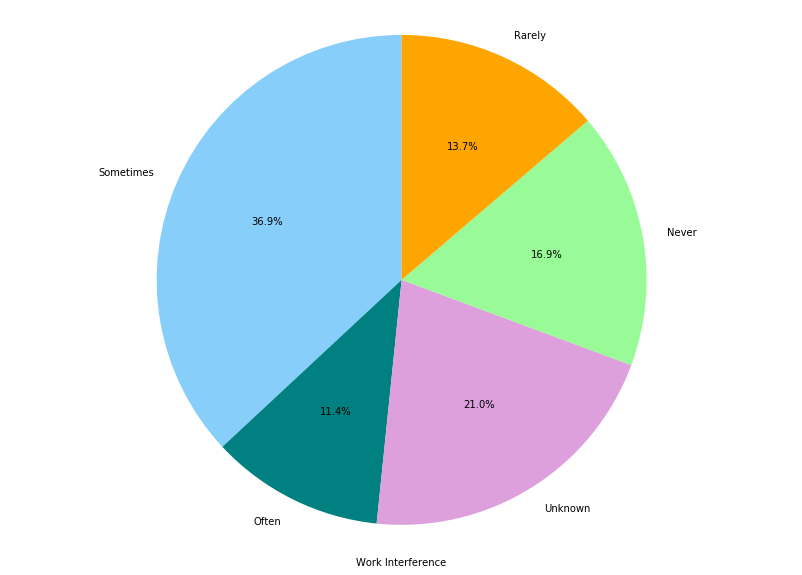

In [22]:
#If you have a mental health condition, do you feel that it interferes with your work?
labels= ['Sometimes', 'Often', 'Unknown', 'Never','Rarely']
colors=['lightskyblue', 'teal', 'plum', 'palegreen','orange']
sizes= [465,144,264,213,173]

plt.figure(figsize=(14,10))
plt.pie(sizes,labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.xlabel('Work Interference')
plt.show()

##### Insight: Close to 50% people claimed that they often encounter interference with their work due to their mental health issues.

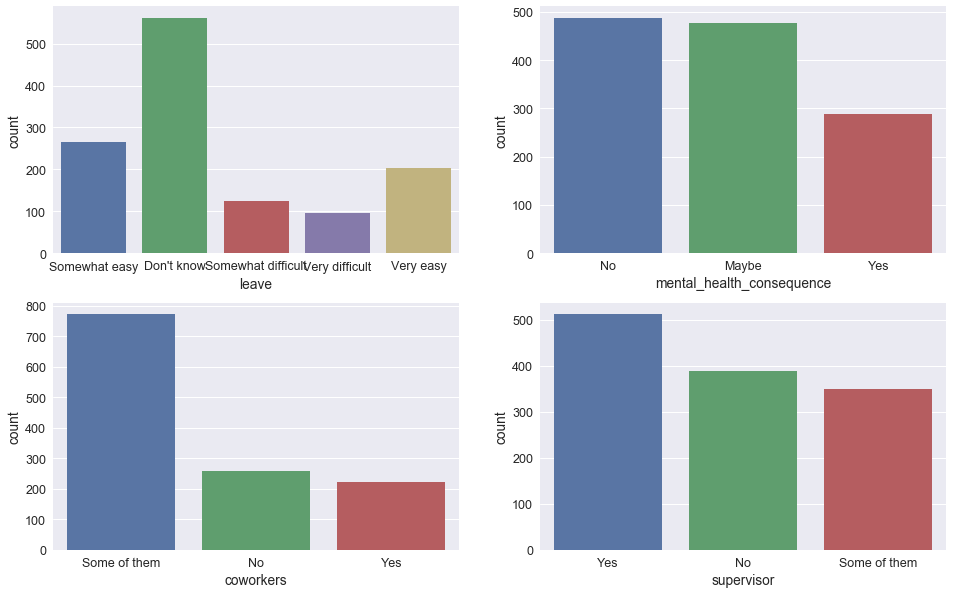

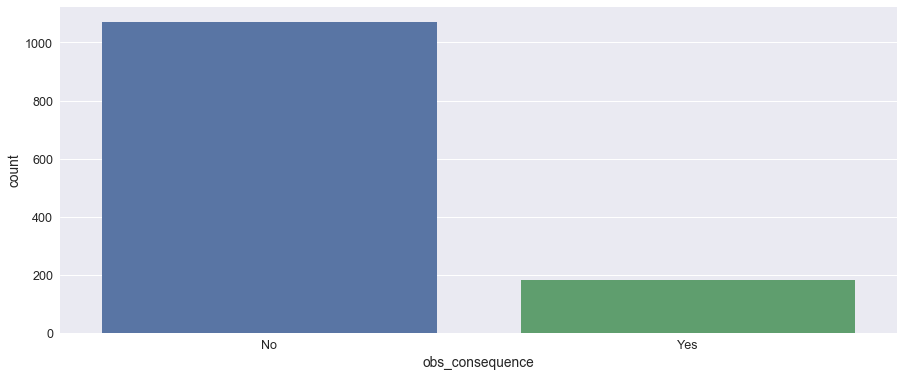

In [167]:
# How easy is it for you to take medical leave for a mental health condition?
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.countplot(df_survey_data['leave'])
# Do you think that discussing a mental health issue with your employer would have negative consequences?
plt.subplot(2,2,2)
sns.countplot(df_survey_data['mental_health_consequence'])
# Would you be willing to discuss a mental health issue with your coworkers?
plt.subplot(2,2,3)
sns.countplot(df_survey_data['coworkers'])
# Would you be willing to discuss a mental health issue with your direct supervisor(s)?
plt.subplot(2,2,4)
sns.countplot(df_survey_data['supervisor'])
# Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
plt.figure(figsize=(15,6))
sns.countplot(df_survey_data['obs_consequence'])

##### Insights:
**1. A large proportion of the surveyors think that there would be negative consequences for discussing a mental health issues with their employer while some are not sure about that.<br>**
**2. A large proportion of surveyors are willing to discuss their mental health with their co-workers, showing a positive and healthy work environment in most of the tech companies.<br>**
**4. More people are willing to discuss mental health issues with supervisors as compared to discussion with the co-workers.<br>**
**5. Majority of people have not seen negative consequences for co-workers with mental health issues in their workplace but some have.**

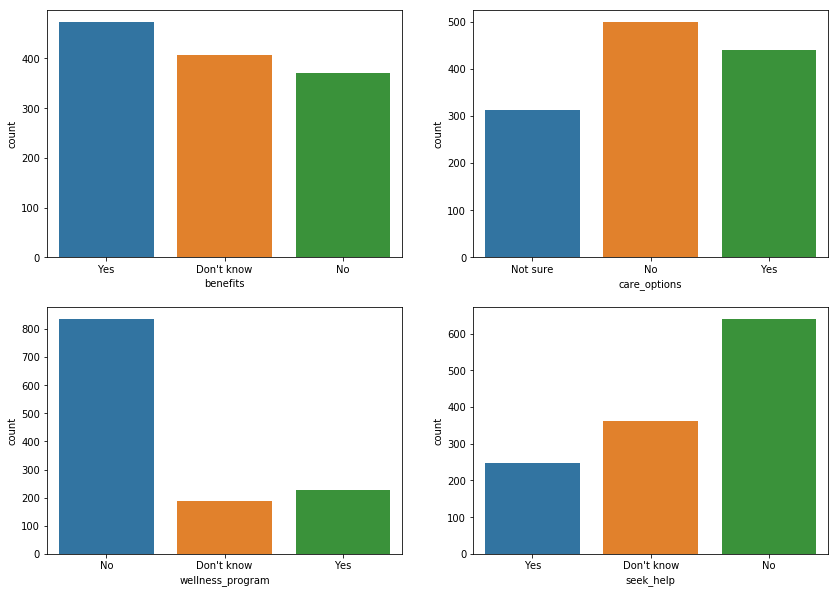

In [23]:
# Does your employer provide mental health benefits?
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.countplot(df_survey_data['benefits'])
# Do you know the options for mental health care your employer provides?
plt.subplot(2,2,2)
sns.countplot(df_survey_data['care_options'])
# Has your employer ever discussed mental health as part of an employee wellness program?
plt.subplot(2,2,3)
sns.countplot(df_survey_data['wellness_program'])
#Does your employer provide resources to learn more about mental health issues and how to seek help?
plt.subplot(2,2,4)
sns.countplot(df_survey_data['seek_help'])


## Recommendations
#### For Employers –

-    More than 50% of employees are suffering from mental health issues. So, employers should mandate the provision health programs to its employees
-    Allow flexible work environment – Flexible scheduling, Modified break schedule, Work from home/Flexi-place
-    Provide day-to-day guidance and feedback. Also, positive praise and reinforcement will be beneficial to employees
 

#### For Employees –

-    Employees should talk to employers about their mental health issues so that they can aid them with benefit provisions like working from home, extra leaves etc.
-    Employees should be aware of their health coverage and aid programs provided by their employer and should actively participate in any wellness program.
-    Proper feedback should be given related to effectiveness of the employer’s health program while leaving the organization. This might help in improving existing health policies.

